# Analyzing videos of single lines

## Initialization

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
from py.config import cfg
import py.logs as logs
import py.vidTools as vt
from py.imshow import imshow
import matplotlib.pyplot as plt
LOGGERDEFINED = logs.openLog('vidAnalysis.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# measure videos

measure all videos

### measure all videos

In [89]:
# measure all of the videos
errorVids = vt.measureVideosRecursive(os.path.join(cfg.path.server, r'singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00'), \
                                      diag=0, overwrite=0, measureHoriz=True, measureXS=True, exportVert=True, exportHoriz=True)

INFO: detecting nozzle in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109
INFO: measuring horiz frames in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_vid_xs2.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_vid_xs3.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_vid_xs4.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Prin

### summarize all video data

In [172]:
tt, u = vt.videoSummary(os.path.join(cfg.path.server, 'singleLines'), cfg.path.fig)

INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.25
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.50
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.75
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_3.00
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_3.50
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_4.00
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.50_S_2.25
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Sho

In [170]:
import metrics as me
vs,uv = me.importStillsSummary(file='videoSummary.csv', diag=True)

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['projectionN', 'projShiftN', 'vertDispBotN', 'vertDispTopN', 'vertDispMidN']


# test one video

In [171]:
# badfiles = vs[(vs.projectionN.isna())|(vs.projectionN_N<5)]
badfiles = vs[(vs.sweepType=='visc_20')&(vs.vertDispBotN>0.5)]
badfiles[['bn', 'projectionN']]

bn  projectionN
62   I_M4_S_2.25_210519        -0.42
63   I_M4_S_2.25_210921        -0.54
64   I_M4_S_2.50_210519        -0.56
66   I_M4_S_2.75_210519        -0.44
71   I_M5_S_2.25_210519        -0.62
73   I_M5_S_2.50_210519        -0.59
75   I_M5_S_2.75_210519        -0.45
77   I_M5_S_3.00_210519        -0.37
81   I_M6_S_2.25_210519        -0.59
82   I_M6_S_2.25_210824        -0.56
84   I_M6_S_2.50_210519        -0.52
87   I_M6_S_2.75_210519        -0.70
90   I_M6_S_3.00_210519        -0.67
93   I_M6_S_3.50_210519        -0.42
109  I_M8_S_2.25_210921        -0.69
111  I_M8_S_2.75_210519        -0.68
113  I_M8_S_3.00_210519        -0.55
117  I_M8_S_4.00_210519        -0.38
124  I_M9_S_3.50_210519        -0.50

In [95]:
for i,row in badfiles.iterrows():
    vd = vt.vidData(row['folder'])
    vd.detectNozzle()
    vd.measureVideoHoriz(overwrite=1, topthresh=120)

INFO: detecting nozzle in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_v1_210728
INFO: measuring horiz frames in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_v1_210728
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_v1_210728\I_3.00_S_3.00_v1_210728_vidHorizMeasures.csv
INFO: detecting nozzle in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M4S_S_3.00T\I_M4S_S_3.00T_211005
INFO: measuring horiz frames in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M4S_S_3.00T\I_M4S_S_3.00T_211005
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M4S_S_3.00T\I_M4S_S_3.00T_211005\I_M4S_S_3.00T_211005_vidHorizMeasures.csv
IN

In [165]:
folder = badfiles.iloc[1]['folder']
folder = os.path.join(cfg.path.server, 'singleLines', 'mineral812S LapRDT', 'I_M4S_S_2.50T', 'I_M4S_S_2.50T_210518')
vd = vt.vidData(folder)
vd.detectNozzle()

INFO: detecting nozzle in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M4S_S_2.50T\I_M4S_S_2.50T_210518


0

#### fix nozzle detection

In [78]:
vd.xL, vd.xR, vd.yB

(320, 440, 351)

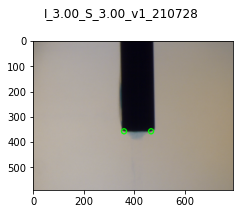

In [15]:
# vd.yB = 420
vd.drawDiagnostics(1)

In [23]:
vd.exportNozzleDims()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_2.75_S_2.75\I_2.75_S_2.75_VI_2.5_VS_2.5_210824\I_2.75_S_2.75_VI_2.5_VS_2.5_210824_nozDims.csv


In [529]:
vd.xL = 320
vd.xR = 433
vd.yB = 340
vd.createNozzleMask()

INFO: Threshold: 190, product: 34.20643638704141, white:80


({'name': 'horiz1',
  'time': 41.037215060002225,
  'frac': 0.62,
  'behindX': 2,
  'projection': -0.41007194244604317,
  'projShift': 0.15827338129496402,
  'vertDispBot': 0.4244604316546763,
  'vertDispTop': 1.2183967112024667,
  'vertDispMid': 0.8214285714285715},
 {'name': '',
  'time': 's',
  'frac': '',
  'behindX': 'mm',
  'projection': 'mm',
  'projShift': 'mm',
  'vertDispBot': 'mm',
  'vertDispMid': 'mm',
  'vertDispTop': 'mm'})

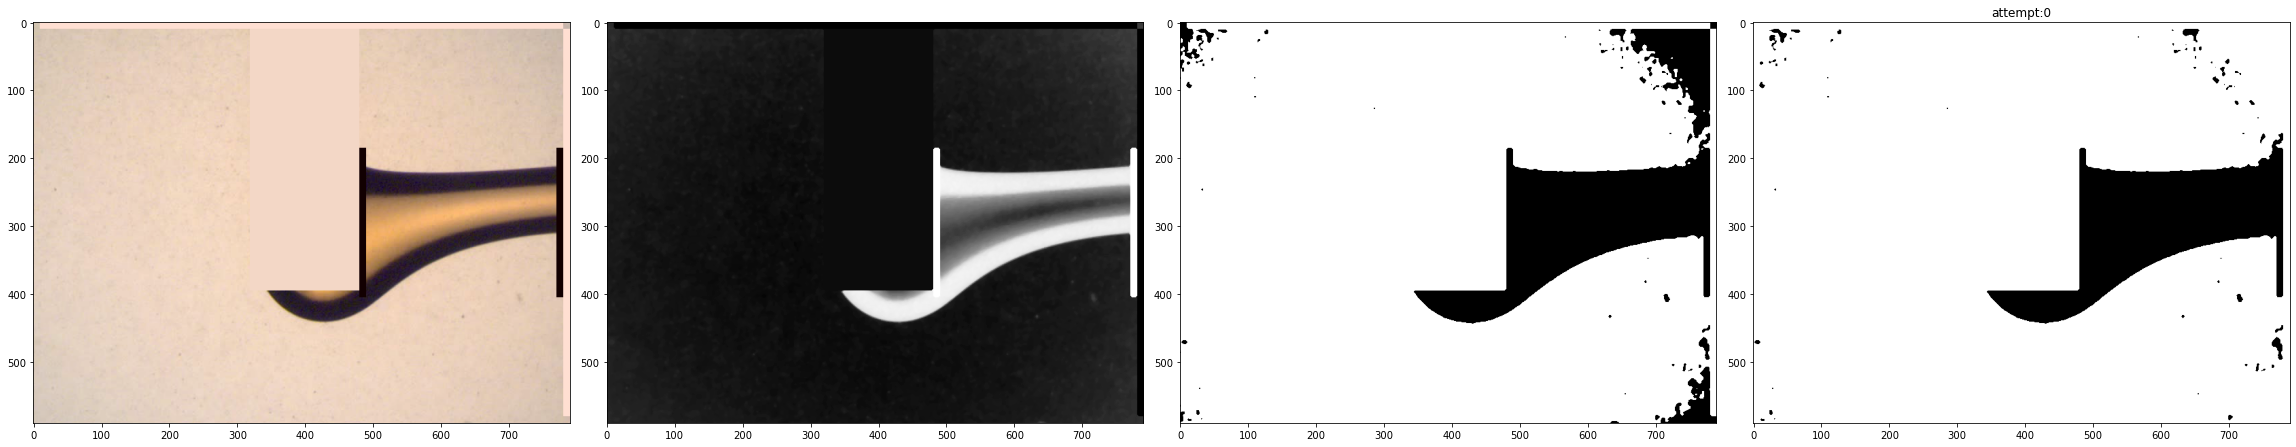

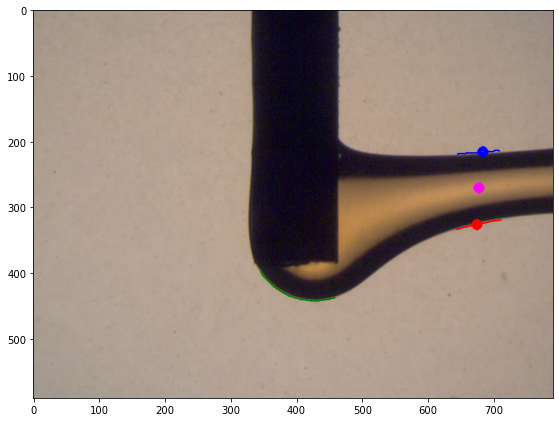

In [166]:
# measure a single frame
vd.measureFrameFromLine('horiz1', 0.62, diag=2)

In [167]:
vd.measureVideoHoriz(overwrite=1, topthresh=110)

INFO: measuring horiz frames in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M4S_S_2.50T\I_M4S_S_2.50T_210518
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M4S_S_2.50T\I_M4S_S_2.50T_210518\I_M4S_S_2.50T_210518_vidHorizMeasures.csv


(      name   time  frac  behindX  projection  projShift  vertDispBot  \
 0   horiz0  44.97  0.30        2       -0.36       0.24         0.28   
 1   horiz0  45.07  0.33        2       -0.37       0.26         0.28   
 2   horiz0  45.16  0.36        2       -0.37       0.30         0.31   
 3   horiz0  45.93  0.62        2       -0.37       0.30         0.60   
 4   horiz0  46.02  0.65        2       -0.37       0.26         0.61   
 5   horiz0  46.12  0.68        2       -0.37       0.28         0.62   
 6   horiz0  46.21  0.71        2       -0.37       0.27         0.62   
 7   horiz0  46.31  0.74        2       -0.37       0.22         0.62   
 8   horiz0  46.40  0.77        2       -0.37       0.29         0.64   
 9   horiz0  46.50  0.81        2       -0.36       0.28         0.64   
 10  horiz0  46.59  0.84        2       -0.37       0.28         0.63   
 11  horiz0  46.69  0.87        2       -0.37       0.27         0.63   
 12  horiz0  46.78  0.90        2       -0.37      

#### overwrite images

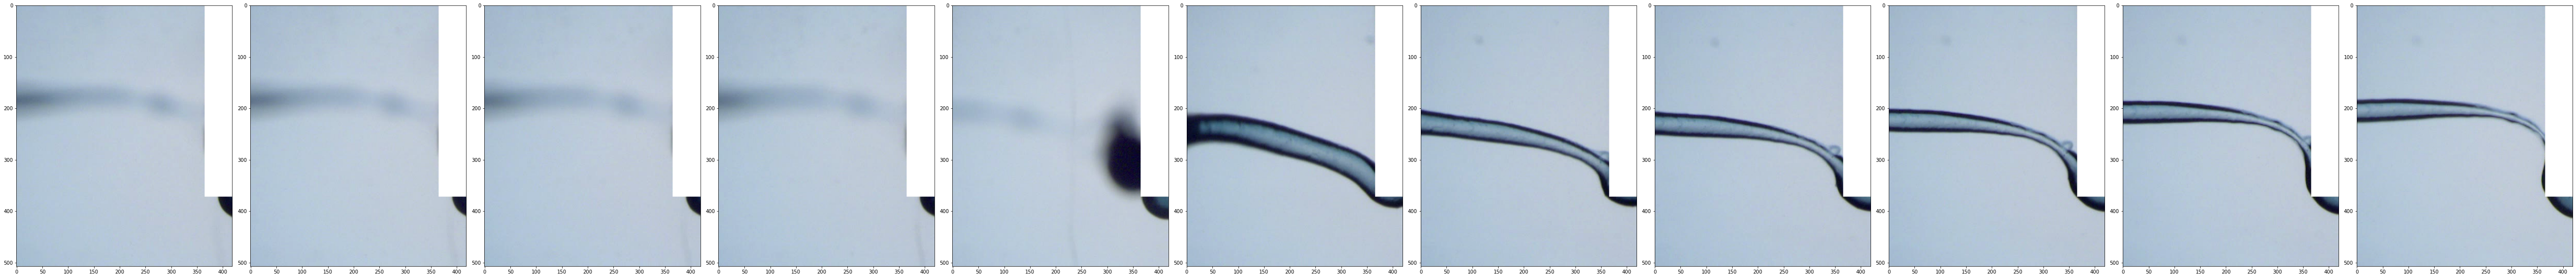

In [63]:
dt0 = -1.5
flist = [vd.getLineFrame('xs2', t) for t in np.arange(dt0, dt0+1.1, 0.1)]
imshow(*flist)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\PEGDA LapRD\I_PEG7.5_S_2.25\I_PEG7.5_S_2.25_210630\I_PEG7.5_S_2.25_210630_vid_xs2.png


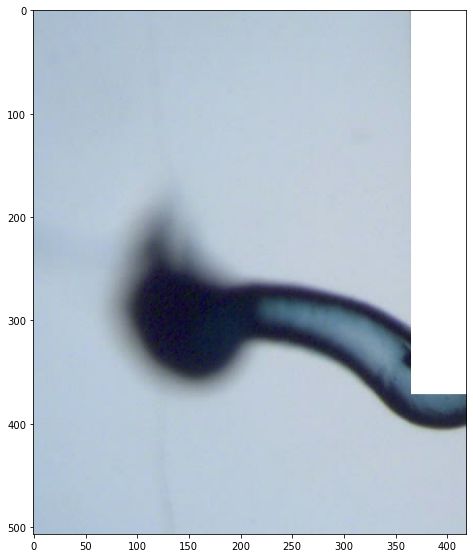

In [67]:
vd.overwriteFrame('xs2',-1.06, diag=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\PEGDA LapRD\I_PEG5_S_2.50\I_PEG5_S_2.50_210630\I_PEG5_S_2.50_210630_vidXSMeasures.csv


(  line    aspect    xshift    yshift   area   x0   y0   w    h          xc  \
 0  xs2  3.833333 -0.008886 -0.018535    874  103   90  30  115  117.733410   
 1  xs3  4.102273 -0.019344  0.086846  18068  131   15  88  361  173.297709   
 2  xs4  5.333333 -0.128613  0.053334   1151  199  161  30  160  210.141616   
 3  xs5  0.082474 -0.014890 -0.121203    395   74  291  97    8  121.055696   
 
            yc  roughness  
 0  145.368421   0.476553  
 1  226.851395   0.028028  
 2  249.533449   0.828616  
 3  294.030380   0.067731  ,
 {'line': '',
  'aspect': 'h/w',
  'xshift': 'w',
  'yshift': 'h',
  'area': 'px',
  'x0': 'px',
  'y0': 'px',
  'w': 'px',
  'h': 'px',
  'xc': 'px',
  'yc': 'px',
  'roughness': ''})

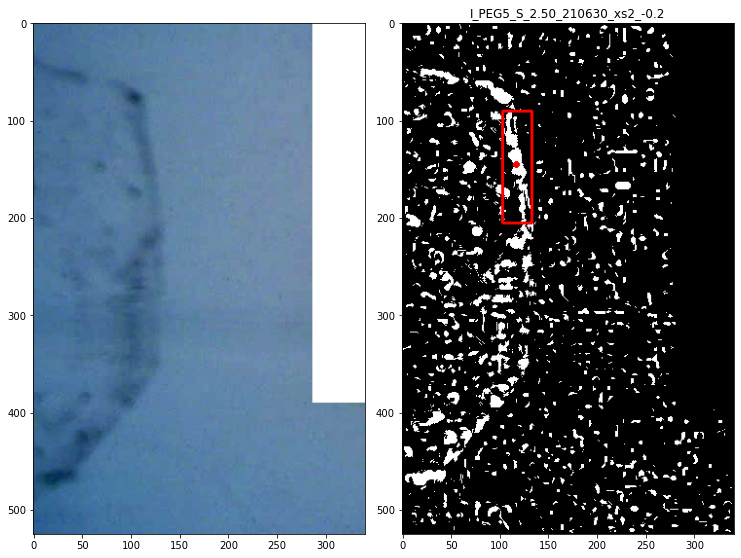

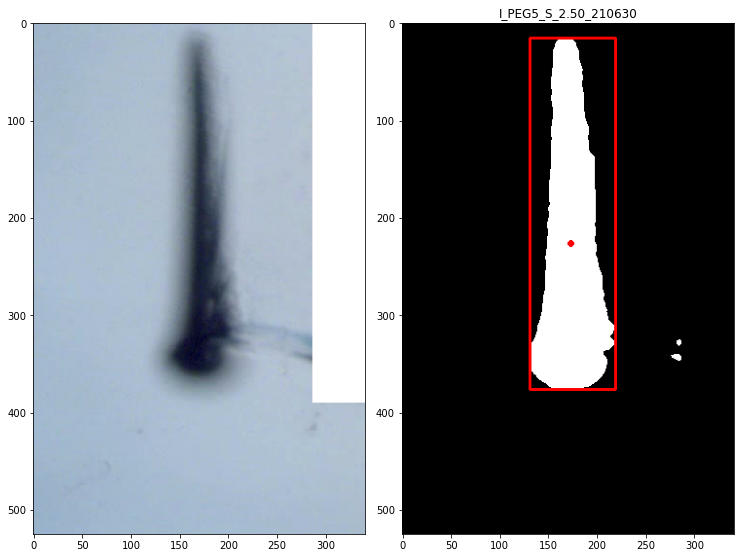

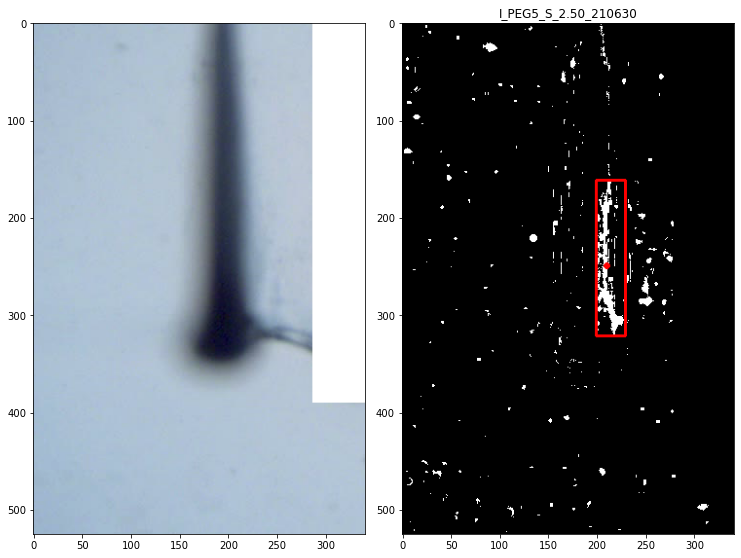

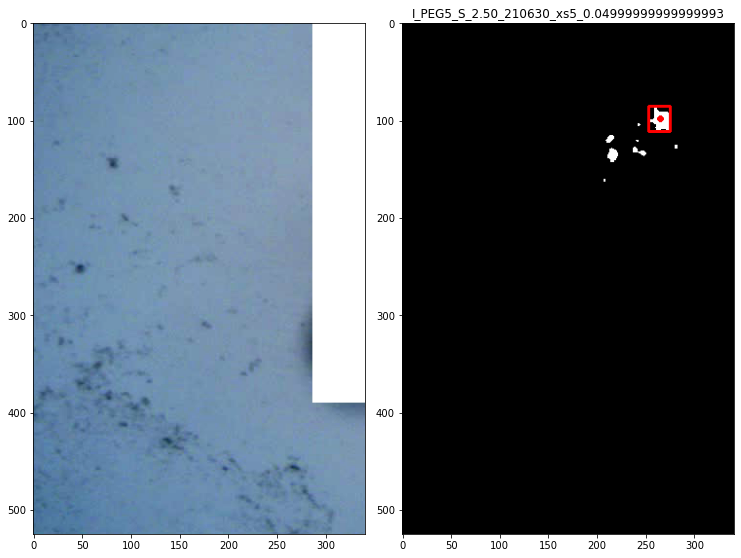

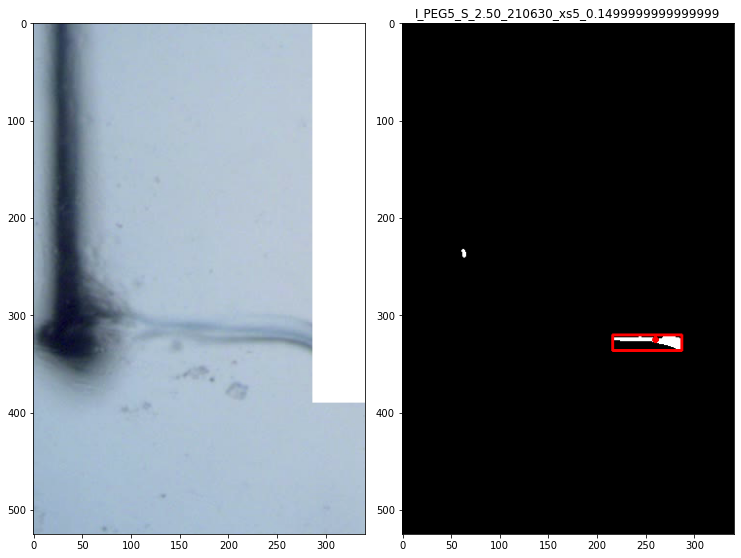

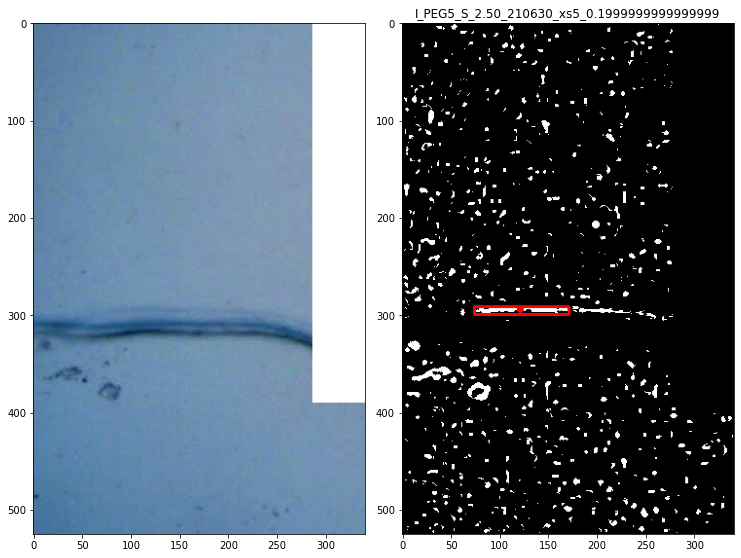

In [30]:
vd.measureVideoXS(overwrite=1, diag=1)

## test nozzle detection over several videos

..F.E........F..F...
ERROR: runTest (__main__.TestNozDetect)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\lmf1\Documents\GitHub\embedded3DPvids\py\vidTools.py", line 401, in detectNozzle
    raise ValueError('Failed to detect nozzle after 3 iterations')
ValueError: Failed to detect nozzle after 3 iterations

FAIL: runTest (__main__.TestNozDetect)
----------------------------------------------------------------------
AssertionError: False is not true : text_xR failed on //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812 LapRD\I_M4_S_2.50\I_M4_S_2.50_210519, expected-actual = 22

FAIL: runTest (__main__.TestNozDetect)
----------------------------------------------------------------------
AssertionError: False is not true : text_xR failed on //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M6S_S_2.25T\I_M6S_S_2.25T_210518, expected-act

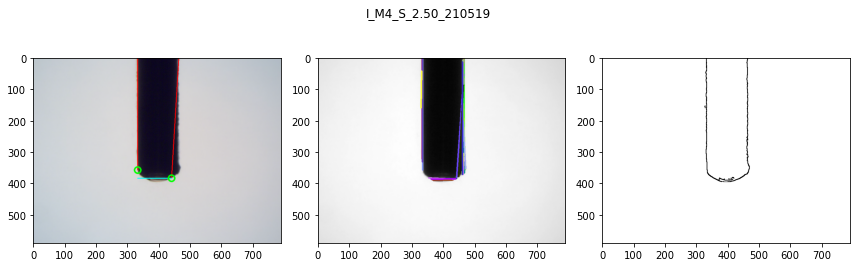

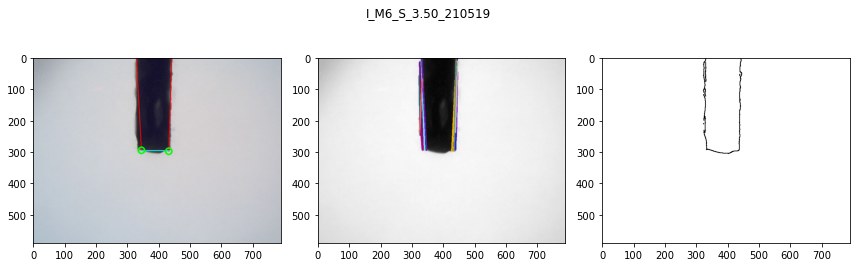

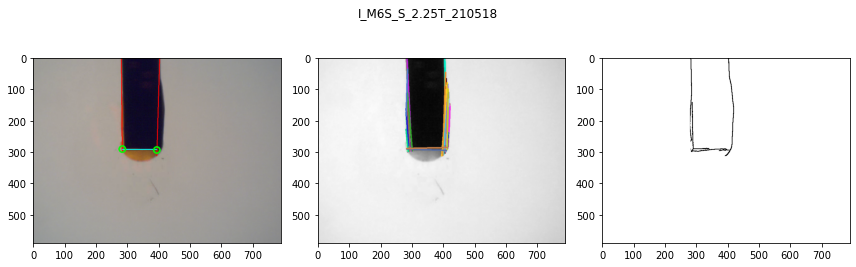

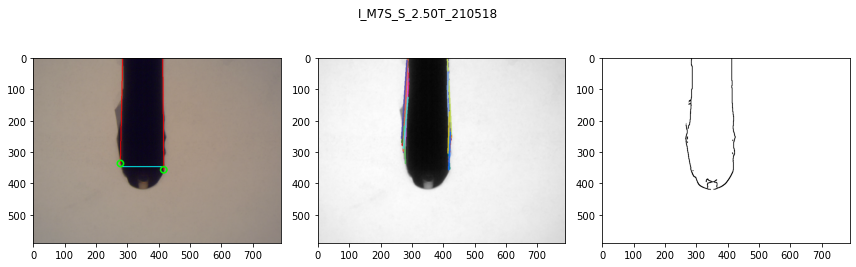

In [305]:
run ../tests/test_nozDetect